<a href="https://colab.research.google.com/github/soccersuki/PRML/blob/master/PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overall

I applied PCA and LDA to the 2-d samples generated by two Gaussian distributions whose parameters are given as follows:

\begin{eqnarray} \mu_1 = \left( \begin{array}{ccccc} 3 \\ 1 \end{array} \right) , {\Sigma_1} = \left(  \begin{array}{ccccc}  1 & 2 \\ 2 & 5 \end{array}  \right)\end{eqnarray}
\begin{eqnarray} 
{\Sigma_1} = \left(  \begin{array}{ccccc}  1 & 2 \\ 2 & 5 \end{array}  \right)  \end{eqnarray}
\begin{eqnarray} \mu_2 = \left( \begin{array}{ccccc} 1 \\ 3 \end{array} \right) , {\Sigma_2} = \left(  \begin{array}{ccccc}  1 & 2 \\ 2 & 5 \end{array}  \right)  \end{eqnarray}



## (1) Plot

I show the scatter plot of bi-variate random numbers (2-d samples) $X$ generated from the above two distributions.

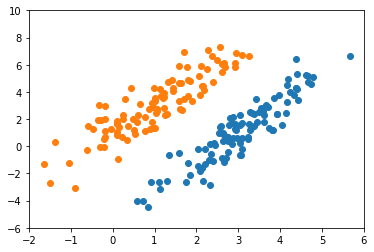

In [ ]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
cm = plt.get_cmap("tab10")
m1 = np.array([3, 1])
s1 = np.array([[1, 2], [2, 5]])
m2 = np.array([1, 3])
s2 = np.array([[1, 2], [2, 5]])

N = 100

x1 = np.random.multivariate_normal(m1, s1, N)
x2 = np.random.multivariate_normal(m2, s2, N)
plt.plot(x1[:,0], x1[:,1], 'o', color=cm(0))
plt.plot(x2[:,0], x2[:,1], 'o', color=cm(1))
plt.xlim(-2,6)
plt.ylim(-6,10)
plt.show()


## (2) PCA

I apply PCA to the 2-d samples generated in (1) by assuming two distributions as a single sample set, and draw the 1st principal axis on the scatter plot in (1). 

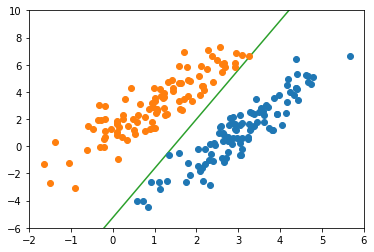

In [ ]:
x = np.concatenate([x1,x2])
m = np.mean(x, axis=0)
Covariance_matrix = (1/x.shape[0]) * ((x - m).T @ (x - m))

eigvals, eigvecs = LA.eig(Covariance_matrix)
eigval_max_index = np.argmax(eigvals)
eigvec_max = eigvecs[:, eigval_max_index]

t = np.arange(-100,100,1)
x1_pca, x2_pca = eigvec_max.reshape(2,1) @ t.reshape(1, 200) + m.reshape(2,1)


plt.plot(x1_pca, x2_pca, color=cm(2))
plt.plot(x1[:,0], x1[:,1], 'o', color=cm(0))
plt.plot(x2[:,0], x2[:,1], 'o', color=cm(1))
plt.xlim(-2,6)
plt.ylim(-6,10)
plt.show()


## (3) LDA

I apply Fisher LDA to the 2-d samples generated in (1) by assuming the two distributions are two different classes. I draw the calculated axis on the scatter plot.

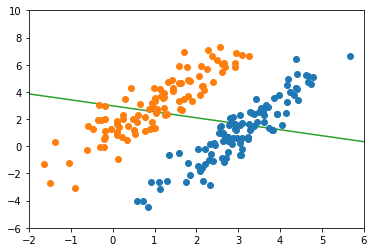

In [ ]:
S_w = ((x1 - m1).T @ (x1 - m1)) + ((x2 - m2).T @ (x2 - m2))
w = LA.inv(S_w) @ (m2 - m1)

x1_lda, x2_lda = w.reshape(2,1) @ t.reshape(1, 200) + m.reshape(2,1)

plt.plot(x1_lda, x2_lda, color=cm(2))
plt.plot(x1[:,0], x1[:,1], 'o', color=cm(0))
plt.plot(x2[:,0], x2[:,1], 'o', color=cm(1))
plt.xlim(-2,6)
plt.ylim(-6,10)
plt.show()


## (4) Histograms

I show the 1-d histograms of the sample data transformed by the calculated axes in (2) and (3).

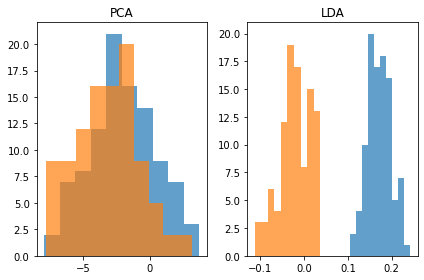

In [ ]:
s_pca = x @ eigvec_max
y_lda1 = x1 @ (-w)
y_lda2 = x2 @ (-w)


fig, axes = plt.subplots(1,2)
axes[0].hist(s_pca[:N-1], alpha=0.7, color=cm(0))
axes[0].hist(s_pca[N:], alpha=0.7, color=cm(1))
axes[0].set_title(r'PCA')
axes[1].hist(y_lda1, alpha=0.7, color=cm(0))
axes[1].hist(y_lda2, alpha=0.7, color=cm(1))
axes[1].set_title(r'LDA')
fig.tight_layout()
plt.show()

# Discussions

Both PCA and LDA are linear transformation techniques that commonly used for dimensionality reduction. PCA ignores class labels and its goal is to find the directions that maximize the variance in a dataset. In contrast to PCA, LDA computes the directions that will represent the axes that maximize the separation between multiple classes.

### PCA
In the histogram of PCA, we can find that there is one peak. It means that many parts of the two classes overlap each other, because PCA ignores class labels. However, both of the classes have wide tails of the histogram. So PCA represents the data of each class in more detail than LDA.

### LDA
On the other hand, in the histogram of LDA, we can find that there are two peaks. It means that the two classes are clearly separated, because LDA computes the directions that will represent the axes that maximize the separation between multiple classes. However, because LDA does not preserve the features of each class of data, some datas have been destroyed.

